In [2]:
import serial
import time
import csv


# Replace with your Arduino's serial port
PORT = 'COM4'  # e.g., 'COM*' on Windows or '/dev/ttyUSB0' on Linux
BAUD_RATE = 500000
T_RECORD = 10 # Recording duration in minutes
DURATION = T_RECORD * 60  #
OUTPUT_FILE = 'arduino_log.csv'

def sampling():
    i = 1
    with serial.Serial(PORT, BAUD_RATE, timeout=1) as ser, open(OUTPUT_FILE, 'w', newline='') as f:
        writer = csv.writer(f, delimiter=';')  # <-- use semicolon
        writer.writerow(['index', 'value'])

        start_time = time.time()
        while time.time() - start_time < DURATION:
            try:
                
                line = ser.readline().decode('utf-8').strip()
                if line:
                    writer.writerow([i, line])  # <-- use semicolon
            except Exception as e:
                print(f"Error reading line: {e}")
                continue
            i += 1
        end_time = time.time()
        elapsed_time = end_time - start_time
        sampling_rate = i / elapsed_time if elapsed_time > 0 else 0
        print(f"Sampling rate: {sampling_rate:.2f} samples/second")
        print(f"Total samples collected: {i}")
        print(f"Elapsed time: {elapsed_time:.2f} seconds")
    print(f"Logging complete. Saved to {OUTPUT_FILE}")
    return sampling_rate

if __name__ == '__main__':
    sampling_rate = sampling()

Sampling rate: 335.84 samples/second
Total samples collected: 223529
Elapsed time: 665.59 seconds
Logging complete. Saved to arduino_log.csv


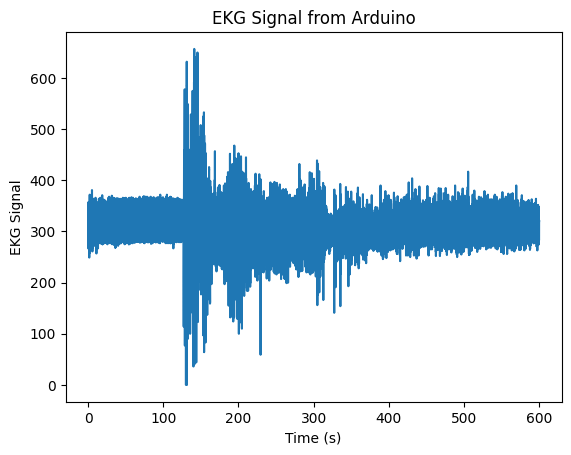

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# This cell only works for the file 'arduino_log_belastung.csv'
dfRad = pd.read_csv('arduino_log_belastung.csv', sep = ';', header = 0, names = ['Frames' , 'EKG', 'Notes'], index_col = 0)
#show the signal in the correct time frame
plt.plot(dfRad.index/945.74, dfRad['EKG'])
plt.xlabel('Time (s)')
plt.ylabel('EKG Signal')
plt.title('EKG Signal from Arduino')
plt.show()

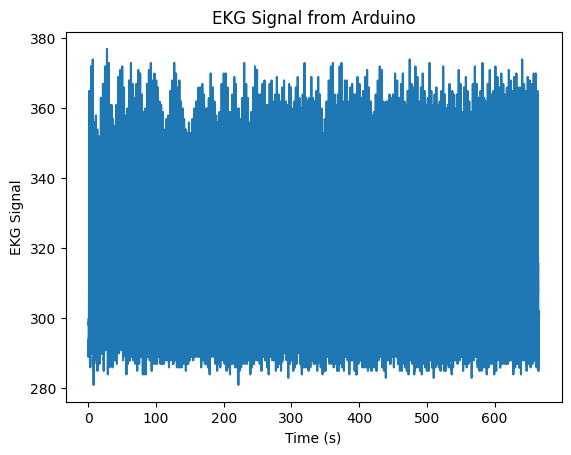

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

dfRad = pd.read_csv('arduino_log.csv', sep = ';', header = 0, names = ['Frames' , 'EKG'], index_col = 0)
#show the signal in the correct time frame
plt.plot(dfRad.index/sampling_rate, dfRad['EKG'])
plt.xlabel('Time (s)')
plt.ylabel('EKG Signal')
plt.title('EKG Signal from Arduino')
plt.show()